In [4]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype 
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats 
from google.colab import drive

In [5]:
drive.mount('mydrive') #Bridge to Google Drive

Mounted at mydrive


In [6]:
wbr = pd.read_csv ("/content/mydrive/MyDrive/EDEM/PEP/All_Pokemon.csv", sep= ",", decimal = ".") #Load data
wbr #Visualise dataframe


,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,30,580,96.666667,38.908725,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,130,580,96.666667,31.841622,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,80,500,83.333333,7.453560,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.50,2.0,0.5,2.0,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,50,680,113.333333,39.334746,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


In [7]:
res = wbr.Mean.describe()
print (res)

m  = res[1]
sd = res[2]
n  = res[0]

count    1032.000000
mean       73.108043
std        20.112591
min        29.166667
25%        55.000000
50%        76.500000
75%        85.833333
max       130.000000
Name: Mean, dtype: float64


In [8]:
wbr.loc[  (wbr['Mean']<(m-sd)) ,"Mean_str"]= "Below mean"
wbr.loc[ ((wbr['Mean']>(m-sd)) & (wbr['Mean']<(m+sd))) ,"Mean_str"]= "Average mean"
wbr.loc[  (wbr['Mean']>(m+sd)) ,"Mean_str"]= "Above mean"


In [9]:

my_categories=["Below mean", "Average mean", "Above mean"]
my_mean_type = CategoricalDtype(categories=my_categories, ordered=True)
wbr["Mean_cat"] = wbr.Mean_str.astype(my_mean_type)
wbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number                   1032 non-null   int64   
 1   Name                     1032 non-null   object  
 2   Type 1                   1032 non-null   object  
 3   Type 2                   548 non-null    object  
 4   Abilities                1032 non-null   object  
 5   HP                       1032 non-null   int64   
 6   Att                      1032 non-null   int64   
 7   Def                      1032 non-null   int64   
 8   Spa                      1032 non-null   int64   
 9   Spd                      1032 non-null   int64   
 10  Spe                      1032 non-null   int64   
 11  BST                      1032 non-null   int64   
 12  Mean                     1032 non-null   float64 
 13  Standard Deviation       1032 non-null   float64 
 14  Generati

In [39]:
wbr.loc [(wbr["Generation"] == 1.0), "Generation_cat"] = "GEN 1" 
wbr.loc [(wbr["Generation"] == 2.0), "Generation_cat"] = "GEN 2"
wbr.loc [(wbr["Generation"] == 3.0), "Generation_cat"] = "GEN 3"
wbr.loc [(wbr["Generation"] == 4.0), "Generation_cat"] = "GEN 4"
wbr.loc [(wbr["Generation"] == 5.0), "Generation_cat"] = "GEN 5"
wbr.loc [(wbr["Generation"] == 6.0), "Generation_cat"] = "GEN 6"
wbr.loc [(wbr["Generation"] == 7.0), "Generation_cat"] = "GEN 7"
wbr.loc [(wbr["Generation"] == 8.0), "Generation_cat"] = "GEN 8"

pd.crosstab(wbr.Generation, wbr.Generation_cat)

Generation_cat,GEN 1,GEN 2,GEN 3,GEN 4,GEN 5,GEN 6,GEN 7,GEN 8
Generation,,,,,,,,
1.0,151,0,0,0,0,0,0,0
2.0,0,100,0,0,0,0,0,0
3.0,0,0,138,0,0,0,0,0
4.0,0,0,0,116,0,0,0,0
5.0,0,0,0,0,163,0,0,0
6.0,0,0,0,0,0,133,0,0
7.0,0,0,0,0,0,0,116,0
8.0,0,0,0,0,0,0,0,115


In [40]:
my_categories=["GEN 1", "GEN 2", "GEN 3", "GEN 4", "GEN 5", "GEN 6","GEN 7","GEN 8"]
my_Generation= CategoricalDtype(categories=my_categories, ordered=True) 
wbr["Generation_cat_2"] = wbr.Generation_cat.astype(my_Generation)
wbr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number                   1032 non-null   int64   
 1   Name                     1032 non-null   object  
 2   Type 1                   1032 non-null   object  
 3   Type 2                   548 non-null    object  
 4   Abilities                1032 non-null   object  
 5   HP                       1032 non-null   int64   
 6   Att                      1032 non-null   int64   
 7   Def                      1032 non-null   int64   
 8   Spa                      1032 non-null   int64   
 9   Spd                      1032 non-null   int64   
 10  Spe                      1032 non-null   int64   
 11  BST                      1032 non-null   int64   
 12  Mean                     1032 non-null   float64 
 13  Standard Deviation       1032 non-null   float64 
 14  Generati

In [41]:
my_ct = pd.crosstab(wbr.Mean_cat, wbr.Generation_cat_2, normalize="columns", margins=True)*100 

round (my_ct, 1)

Generation_cat_2,GEN 1,GEN 2,GEN 3,GEN 4,GEN 5,GEN 6,GEN 7,GEN 8,All
Mean_cat,,,,,,,,,
Below mean,22.5,24.0,29.7,16.4,22.7,11.3,19.0,25.2,21.4
Average mean,73.5,69.0,58.7,69.8,64.4,48.1,58.6,60.9,62.9
Above mean,4.0,7.0,11.6,13.8,12.9,40.6,22.4,13.9,15.7


In [42]:
ct = pd.crosstab(wbr.Mean_cat, wbr.Generation_cat_2)
ct
stats.chi2_contingency(ct)

(100.20020309990485,
 4.341365846519509e-15,
 14,
 array([[ 32.33624031,  21.41472868,  29.55232558,  24.84108527,
          34.90600775,  28.48158915,  24.84108527,  24.62693798],
        [ 94.96027132,  62.8875969 ,  86.78488372,  72.9496124 ,
         102.50678295,  83.64050388,  72.9496124 ,  72.32073643],
        [ 23.70348837,  15.69767442,  21.6627907 ,  18.20930233,
          25.5872093 ,  20.87790698,  18.20930233,  18.05232558]]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

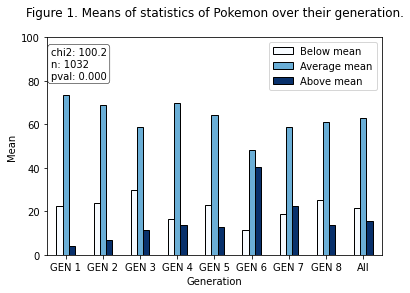

In [45]:
my_ct = my_ct.transpose()
my_ct.plot(kind="bar", edgecolor = "black", colormap = "Blues")
plt.title("Figure 1. Means of statistics of Pokemon over their generation." "\n")
props = dict (boxstyle="round", facecolor ="white", lw =0.5)
plt.text(-0.4, 81, "chi2: 100.2" "\n" "n: 1032" "\n" "pval: 0.000", bbox=props)
plt.legend(["Below mean", "Average mean", "Above mean"])
plt.xlabel('Generation')
plt.ylabel('Mean')
plt.ylim(0,100)
plt.xticks(rotation="horizontal")
